<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_3_6_%D1%87%D0%B0%D1%81%D1%82%D1%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Методы векторизации текста (мешок слов, TF-IDF). Ананлиз тональности.

### Методы векторизации текста  

**Текстовая векторизация** — это ключевой процесс преобразования текстовых данных в числовую форму, пригодную для использования в моделях машинного обучения. Текст в своем сыром виде не может быть напрямую использован в большинстве алгоритмов, и поэтому его необходимо превратить в числовые векторы, которые представляют смысл и структуру текста.

Рассмотрим два популярных метода векторизации: мешок слов (Bag of Words) и TF-IDF (Term Frequency-Inverse Document Frequency).


##### Зачем нужна векторизация текста?

Векторизация текста необходима для преобразования текстовых данных в форму, пригодную для использования в алгоритмах машинного обучения. Она позволяет моделям распознавать и анализировать текст, выявлять важные слова и их взаимосвязи, а также устранять лишние шумы и лишние слова.

Без векторизации модели машинного обучения не могут понять текстовые данные и извлекать из них значимую информацию.


### Мешок слов (Bag of Words)

**Мешок слов** — это один из самых простых методов векторизации текста. В этом методе текст представляется в виде множества слов, причем порядок слов не учитывается. Каждый текст преобразуется в вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в документ. Этот метод широко используется для задач классификации текстов и анализа частотности слов.

#### Как работает метод мешка слов:
1. **Создание словаря**: Сначала создается список всех уникальных слов, встречающихся во всех текстах корпуса (например, все слова из набора документов).
2. **Построение векторов**: Для каждого документа создается вектор, длина которого равна количеству уникальных слов в словаре. Каждая позиция в этом векторе соответствует количеству вхождений определенного слова из словаря в документ.
   
Например, если у нас есть два текста:
- Текст 1: "Кошка спит на ковре."
- Текст 2: "Кошка играет с мячом."

То словарь будет выглядеть так: ["Кошка", "спит", "на", "ковре", "играет", "с", "мячом"]. Каждый текст будет представлен вектором:
- Текст 1: [1, 1, 1, 1, 0, 0, 0] (все слова присутствуют по одному разу).
- Текст 2: [1, 0, 0, 0, 1, 1, 1].

#### Преимущества метода:
1. **Простота**: Модель мешка слов чрезвычайно проста в реализации и понимании. Это делает её популярной отправной точкой для многих задач обработки текста.
2. **Эффективность для простых задач**: В задачах, где порядок слов не важен (например, классификация текстов по темам), этот метод может дать хорошие результаты.
3. **Хорошо работает на небольших наборах данных**: На малых объемах текстов и в задачах с небольшими словарями мешок слов может быть эффективным методом для представления данных.

#### Недостатки метода:
1. **Игнорирование порядка слов**: Главным ограничением мешка слов является полное игнорирование порядка слов, что может быть критичным для задач, где важен контекст (например, анализ тональности или выявление смысловых связей между словами).
2. **Разреженность векторов**: При наличии большого словаря вектора становятся очень длинными и разреженными (содержат много нулевых значений), что может требовать больших вычислительных ресурсов для обработки.
3. **Не учитывает значение слов**: Все слова в мешке слов считаются одинаково важными, что не позволяет учитывать важность отдельных терминов или редких слов.



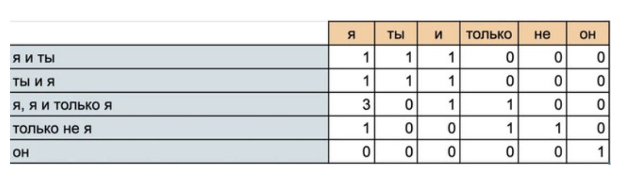

### Пример Sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Пример текстов
texts = ["I love programming.", "Programming is fun!", "I love coding."]

# Создаем объект CountVectorizer
vectorizer = CountVectorizer()

# Преобразуем тексты в мешок слов
X = vectorizer.fit_transform(texts)


In [ ]:
list(X)

[<1x5 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x5 sparse matrix of type '<class 'numpy.int64'>'
 	with 3 stored elements in Compressed Sparse Row format>,
 <1x5 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>]

### Ограничения мешка слов

Мешок слов, несмотря на свою простоту, имеет ряд ограничений. Он не учитывает порядок слов, что может привести к потере смысла текста. Этот метод игнорирует семантическую информацию, такую как синонимы и антонимы, и чувствителен к размеру текста, что может привести к доминированию частых слов.

**Пример**: Представьте два текста: "Не нравится" и "Нравится, но не очень". Мешок слов не различает порядок слов и интерпретирует оба текста одинаково, что может исказить смысл.


### TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF — это более сложный метод векторизации, который учитывает частоту слова в документе и инверсную частоту документа, содержащего это слово, во всем корпусе текстов. Этот метод помогает выделять значимые слова, которые часто встречаются в одном документе, но редко в других. TF-IDF особенно полезен для задач извлечения ключевых слов и поиска информации.


#### Формула TF-IDF

TF-IDF рассчитывается по двум основным формулам: TF и IDF.

TF определяет частоту слова в документе, а IDF — логарифм обратной частоты документа, содержащего это слово, по отношению ко всем документам.

Умножая эти два значения, мы получаем показатель важности слова в конкретном документе относительно всего корпуса текстов.


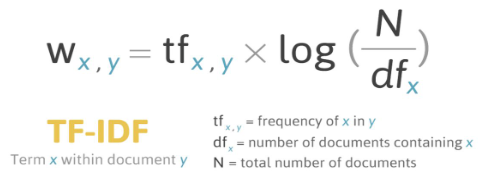



### Пример:
Предположим, у нас есть три документа, и термин "кошки" встречается только в одном из них:
- Документ 1: "Кошки — это домашние животные."
- Документ 2: "Собаки также могут быть домашними животными."
- Документ 3: "Домашние животные приносят радость."

Тогда:
- Частота термина "кошки" в Документе 1 (TF) = 1/5 = 0.2 (так как всего 5 слов в документе).
- Обратная частота документа (IDF) для термина "кошки" = \ \log(3/1) = 1/1.1 \).

Тогда TF-IDF для термина "кошки" в Документе 1 будет \( 0.2 \ 1.1 = 0.22 \).

Таким образом, TF-IDF позволяет определить важные термины, которые часто встречаются в конкретном документе, но редки во всем корпусе.

#### Преимущества TF-IDF:

1. **Простота реализации**: TF-IDF легко реализовать и использовать. Это один из самых ранних методов преобразования текста в числовые векторы, который до сих пор используется во многих приложениях.

2. **Эффективность в простых задачах**: Для небольших текстовых корпусов или задач, где нет сложных зависимостей между словами, TF-IDF работает хорошо, предоставляя простую и полезную информацию о важности слов.

3. **Хорошо подходит для выделения редких, но информативных слов**: TF-IDF присваивает более высокие веса редким словам, которые могут нести важную смысловую нагрузку (например, термины, уникальные для конкретного документа).

4. **Устойчивость к общим словам**: Слова, которые встречаются в большом количестве документов (например, предлоги, союзы), получают низкий вес, что снижает их влияние на анализ.

5. **Отсутствие необходимости в обучении**: В отличие от более сложных моделей, таких как нейронные сети, TF-IDF не требует обучения на данных, что делает его быстрым и малозатратным по ресурсам.

#### Недостатки TF-IDF:

1. **Игнорирование порядка слов**: TF-IDF не учитывает порядок слов в тексте, что может быть критично для задач, где важен контекст (например, для анализа предложений или текста в целом).

2. **Отсутствие учета семантической информации**: TF-IDF не учитывает смысловые связи между словами. Например, синонимы или слова с близкими значениями будут рассматриваться как разные термины.

3. **Невозможность учета контекста**: Модель не понимает контекст, в котором употребляется слово. Например, слово "банк" может означать и финансовое учреждение, и берег реки, но TF-IDF не сможет различить эти значения.

4. **Проблемы с большими корпусами текста**: При работе с большими текстовыми коллекциями (корпусами) матрица TF-IDF может стать очень разреженной (sparse), что затрудняет обработку и требует больше памяти и вычислительных ресурсов.

5. **Чувствительность к длине документа**: В длинных документах термины, которые встречаются относительно редко, могут иметь меньшее значение, чем в коротких документах, из-за нормализации частоты (TF).

6. **Не подходит для сложных языковых задач**: TF-IDF не справляется с задачами, требующими глубокого понимания языка (например, с задачами извлечения смысловой информации или анализа зависимости между предложениями), поскольку не использует информацию о грамматике и синтаксисе текста.

#### Когда TF-IDF хорош:
- Когда нужна быстрая и простая оценка важности слов для задачи, например, для поиска информации (information retrieval), классификации текстов, фильтрации спама и др.
- Для обработки небольших и средних текстовых коллекций, где важна простота и скорость работы.

#### Когда TF-IDF может быть недостаточным:
- В задачах, где важен порядок слов и грамматические связи.
- В задачах, где требуется понимание семантики или контекста текста.
- Для анализа больших корпусов текста, особенно при необходимости учитывать зависимости между документами.

Для более сложных задач часто используют Word Embeddings (например, Word2Vec) или современные трансформерные модели (например, BERT), которые устраняют многие ограничения TF-IDF.

## ПРАКТИКА

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Импортируем класс TfidfVectorizer из библиотеки sklearn для преобразования текстов в матрицу TF-IDF признаков.

texts = ["I love programming.", "Programming is fun!", "I love coding."]
# Определяем список текстов, которые будут использованы для вычисления TF-IDF (веса термов в текстах).

tfidf_vectorizer = TfidfVectorizer()
# Создаём объект TfidfVectorizer, который будет преобразовывать тексты в матрицу TF-IDF признаков.

tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
# Преобразуем список текстов в матрицу TF-IDF. Функция fit_transform обучает векторизатор на текстах и сразу же
# применяет его к данным, создавая матрицу признаков.

print(tfidf_matrix.toarray())
# Выводим на экран полученную матрицу в виде массива numpy, где каждая строка представляет текст, а каждый столбец — это вес терма (слова).

print(tfidf_vectorizer.get_feature_names_out())
# Выводим список всех термов (уникальных слов), которые были использованы для создания матрицы TF-IDF.
# Это список признаков (слов) из текстов.


[[0.         0.         0.         0.70710678 0.70710678]
 [0.         0.62276601 0.62276601 0.         0.4736296 ]
 [0.79596054 0.         0.         0.60534851 0.        ]]
['coding' 'fun' 'is' 'love' 'programming']


Пример с преобразованием

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Импортируем класс CountVectorizer из библиотеки sklearn для создания модели "мешка слов" (bag of words).

# Пример текстов
texts = ["I love programming.", "Programming is fun!", "I love coding.", "I love love coding programming."]
# Определяем список текстов, которые будем преобразовывать в "мешок слов".

# Создаем объект CountVectorizer
vectorizer = CountVectorizer()
# Создаём объект CountVectorizer, который будет преобразовывать тексты в матрицу частот слов.

# Преобразуем тексты в мешок слов
X = vectorizer.fit_transform(texts)
# Применяем метод fit_transform для создания словаря из текстов и одновременно создаём матрицу частот встречаемости слов в текстах.
# Результатом будет разреженная матрица, где строки — это тексты, а столбцы — это уникальные слова (признаки).

# Выводим результат
print("Feature names:", vectorizer.get_feature_names_out())
# Выводим список всех уникальных слов (термов), которые были обнаружены в текстах. Это те признаки, которые будут использоваться для анализа.

print("Bag of Words matrix:\n", X.toarray())
# Преобразуем разреженную матрицу в массив и выводим его. Каждая строка соответствует тексту, а каждый столбец — числу вхождений конкретного слова.


Feature names: ['coding' 'fun' 'is' 'love' 'programming']
Bag of Words matrix:
 [[0 0 0 1 1]
 [0 1 1 0 1]
 [1 0 0 1 0]
 [1 0 0 2 1]]


### Мешок слов и классификация текстов

Одна из базовых задач машинного обучения - это классификация (отнесение объекта к одному из заранее заданных классов). Классификация очень хорошо подходит для задач NLP, так как многие практические задачи можно свести к классификации (определение спама, определение тональности, определение намерения пользователя и т.п.).

Есть очень много алгоритмов МО, которые применимы к NLP. У каждого свои плюсы, минусы и особенности, которые по-разному проявляются на практике.

За одно занятие разобрать все важные алгоритмы не получится, поэтому сегодня поговорим про алгоритмы, которые из-за простоты использования удобно применять в качестве начальной базовой (baseline) модели. Более сложные алгоритмы (бустинги, lstm, трансформеры), практически всегда, будут работать лучше, НО помимо качества в практических задачах часто есть много других требований и ограничений (скорость, память, интерпретируемость и тп), которые могут перевесить разницу в точности.


In [ ]:
import pandas as pd
# Импортируем библиотеку pandas для работы с данными в виде таблиц (DataFrame).

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Импортируем классы CountVectorizer и TfidfVectorizer для преобразования текстовых данных в числовые векторы.
# CountVectorizer — для создания модели "мешка слов", TfidfVectorizer — для вычисления TF-IDF значений.

from sklearn.linear_model import LogisticRegression
# Импортируем модель логистической регрессии из библиотеки sklearn для выполнения задач классификации.

from sklearn.tree import DecisionTreeClassifier
# Импортируем классификатор на основе дерева решений для выполнения классификации.

from sklearn.neighbors import KNeighborsClassifier
# Импортируем k-ближайших соседей (K-Nearest Neighbors, KNN) для классификации на основе расстояния между объектами.

from sklearn.naive_bayes import MultinomialNB
# Импортируем наивный байесовский классификатор (Multinomial Naive Bayes) для задач классификации, особенно для текстов.

from sklearn.ensemble import RandomForestClassifier
# Импортируем Random Forest — ансамблевый метод классификации, который строит множество деревьев решений и объединяет их предсказания.

from sklearn.model_selection import train_test_split
# Импортируем функцию для разделения данных на обучающую и тестовую выборки.

from sklearn.metrics import classification_report, accuracy_score
# Импортируем функции для оценки качества модели. classification_report выводит основные метрики (точность, полнота, F1),
# а accuracy_score вычисляет процент правильных предсказаний.

from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
# Импортируем функции для вычисления косинусного расстояния и косинусной схожести между векторами.

from IPython.display import Image
# Импортируем класс Image для отображения изображений в Jupyter Notebook.

from IPython.core.display import HTML
# Импортируем класс HTML для отображения HTML-контента в Jupyter Notebook.

import warnings  # Импортируем модуль для работы с предупреждениями

# Игнорируем предупреждения для того, чтобы они не отображались в выводе
warnings.filterwarnings('ignore')

# Подключаем Google Drive
from google.colab import drive  # Импортируем модуль для работы с Google Drive в Google Colab
drive.mount('/content/drive')  # Монтируем Google Drive к директории '/content/drive'

Mounted at /content/drive


В этой тетрадке мы рассмотрим задачу определения токсичных твитов.

In [ ]:
data = pd.read_csv('drive/My Drive/labeled.csv')
# Используем функцию read_csv из библиотеки pandas для загрузки данных из CSV файла под названием 'labeled.csv' в объект DataFrame.

In [ ]:
data.tail()
# Выводим первые 5 строк из DataFrame data.


,comment,toxic
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0
14411,До сих пор пересматриваю его видео. Орамбо кст...,0.0


In [ ]:
data.toxic.value_counts(normalize=True)
# Выводим количество уникальных значений в столбце 'toxic' и их доли (частоту) относительно общего числа записей.
# Параметр normalize=True приводит к тому, что вместо абсолютных значений выводятся относительные частоты (проценты).


,proportion
toxic,
0.0,0.66514
1.0,0.33486


In [ ]:
train, test = train_test_split(data, test_size=0.1, shuffle=True)
# Разделяем данные на обучающую (train) и тестовую (test) выборки с помощью функции train_test_split.
# Параметр test_size=0.1 указывает, что 10% данных будет отведено на тестовую выборку, а 90% — на обучающую.
# Параметр shuffle=True гарантирует, что данные будут перемешаны перед разделением, что предотвращает возможную зависимость от порядка данных.


In [ ]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)
# Применяем метод reset_index к обучающей и тестовой выборкам, чтобы сбросить индексы.
# Параметр inplace=True означает, что изменения будут применены непосредственно к объекту, без создания копии.
# После этого у DataFrame будет новый индекс (начиная с 0), а старый индекс не будет сохранён.


### Векторизация текста

Перед тем, как рассматривать алгоритмы классификации, нужно разобраться с тем, как мы будем подавать наши тексты на вход разным алгоритмам. Все они работают с числами, и текст, соответственно, тоже нужно превратить в число. А точнее в набор чисел - вектор.

Самый простой способ векторного представления текста называется "мешком слов" (bag-of-words). Мешок тут не какой-то технический термин, а метафора. В таком способе векторизации никак не учитывается порядок. Слова как бы складываются в "мешок" и перемешиваются.

Если более формально, то для того, чтобы векторизовать некоторый набор документов (=текстов) мешком слов нужно:  
а) составить словарь всех уникальных слов, встречаемых в этих документах <br>
б) зафиксировать порядок слов в словаре и сопоставить каждому из них порядковый индекс <br>
б) составить для каждого документа вектор размерности N (N - равен размеру словаря), где по индексу i стоит частота слова w_i в этом документе.  <br>



Обратите внимание на то, что порядок колонок (слов в словаре) в этой таблице не соответствует порядку слов в текстах.

CountVectorizer в sklearn векторизует как раз таким образом

In [ ]:
vectorizer = CountVectorizer()
# Создаём объект CountVectorizer для преобразования текстов в числовую матрицу на основе модели "мешка слов".
# Векторизатор автоматически токенизирует тексты и подсчитывает частоты слов.

# в векторайзер нужно засовывать тексты строками (токенизация там встроена)
X = vectorizer.fit_transform(train.comment)
# Применяем метод fit_transform к столбцу 'comment' из обучающей выборки.
# Метод fit обучает векторизатор на этих текстах (создаёт словарь уникальных слов), а transform преобразует их в разреженную матрицу частот.




### TF-IDF

Еще вместо частот можно использовать **TF-IDF** (Term Frequency - Inverse Document Frequency). Этот метод улучшает простую модель "мешка слов" (Bag of Words), добавляя важную информацию о том, насколько уникально слово для каждого документа в контексте всего корпуса.

TF-IDF позволяет "оштрафовать" слова, которые встречаются в большом количестве документов (грубо говоря, это стоп-слова, но специфичные для корпуса) и поднять важность слов, которые встречаются часто в небольшом количестве документов. Это делает модель более чувствительной к редким, но информативным словам, что улучшает результаты классификации и других задач.

#### Как это работает:
- **TF (Term Frequency)** измеряет частоту появления термина в документе, что отражает его значимость в конкретном документе. Но просто частота не учитывает, насколько слово распространено по всему корпусу.
- **IDF (Inverse Document Frequency)** позволяет скорректировать эту частоту, уменьшая вес тех слов, которые встречаются во многих документах. Чем реже слово встречается в других документах, тем выше его значение IDF и, соответственно, его вклад в итоговый TF-IDF.

#### Пример использования TF-IDF:
Допустим, в корпусе текстов слова вроде "и", "в", "на" будут иметь низкое значение IDF, так как они встречаются почти в каждом документе и не несут особой смысловой нагрузки. В то же время специфичные термины, которые встречаются только в одном или нескольких документах (например, технические термины или названия), будут иметь высокое значение IDF, что увеличит их вес в классификации или другой задаче анализа текста.

#### Преимущества использования TF-IDF:
- **Лучше выделяет значимые термины**: Повышает важность слов, которые характерны для конкретного документа, но не для всего корпуса.
- **Уменьшает влияние "шумных" слов**: Общие и часто встречающиеся слова, не несущие значимой информации (например, "это", "который", "для"), получают меньший вес, что делает модель более точной.
- **Устойчивость к большому количеству неинформативных слов**: TF-IDF помогает фильтровать "шум" в больших текстовых коллекциях, выделяя более важные и значимые слова для конкретной задачи.

Этот метод часто используется для задач классификации текстов, таких как определение спама, классификация отзывов или новостей, где важно улавливать уникальные термины, характеризующие определенные классы.

In [ ]:
vectorizer = TfidfVectorizer()
# Создаём объект TfidfVectorizer для преобразования текстов в матрицу TF-IDF (веса термов).

X = vectorizer.fit_transform(train.comment)
# Применяем метод fit_transform к столбцу 'comment' из обучающей выборки.
# Метод fit обучает векторизатор на этих текстах (создаёт словарь уникальных слов), а transform преобразует тексты в матрицу TF-IDF.



Векторайзер возвращает результат в виде матрицы

In [ ]:
X.shape

(12970, 64107)

Слов получается в 5 раз больше, чем документов. Некоторые алгоритмы не смогут так обучиться (нужно чтобы признаки <= документы), а те что смогут будут обучаться сильно дольше. И учитывая, что большая часть слов встретились по 1 разу, они все равно никак не помогут.

In [ ]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)
# Создаём объект TfidfVectorizer с параметрами min_df и max_df.
# Параметр min_df=5 означает, что будут учитываться только те слова, которые встречаются в
# как минимум 5 документах (комментариях), что помогает исключить редкие слова и шум.
# Параметр max_df=0.4 указывает, что слова, встречающиеся в более чем 40% документов, будут исключены,
# что позволяет удалить слишком часто встречающиеся слова, которые, как правило, не несут значимой информации.

X = vectorizer.fit_transform(train.comment)
# Применяем метод fit_transform к столбцу 'comment' из обучающей выборки.
# Метод fit обучает векторизатор на этих текстах (создаёт словарь уникальных слов с учетом заданных параметров),
# а transform преобразует тексты в матрицу TF-IDF.

In [ ]:
X.shape

(12970, 7622)

В словаре у нас 7,5 тысяч слов  и каждый документ мы описываем вектором такого размера. В этом векторе положительными будут значения, соответствующие словам, которые есть в этом тексте, а нулевыми - те значения, которые соответствуют словам, которых в тексте нет.

**Нулевых значения будет значительно больше!**
Поэтому для эффективности в sklearn такие матрицы хранятся в специальном sparse (разреженном) формате.

Просто взять и посмотреть на матрицу не получится.

In [ ]:
X

<12970x7622 sparse matrix of type '<class 'numpy.float64'>'
	with 201637 stored elements in Compressed Sparse Row format>

Некоторые алгоритмы не умеют работать с разреженным векторами и такую матрицу можно привести в обычный dense формат (X.todense()) НО будьте острожны с большими матрицами - они будут занимать в памяти ОЧЕНЬ много места.

In [ ]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

**Косинусная близость** (Cosine Similarity) — это мера сходства между двумя векторами, которая основана на косинусе угла между ними в пространстве признаков. Она часто используется для измерения сходства текстов в задачах обработки естественного языка (NLP), особенно после преобразования текста в векторы (например, с помощью TF-IDF или Word Embeddings).

### Формула косинусной близости:
Косинусная близость между двумя векторами \( A \) и \( B \) вычисляется по следующей формуле:



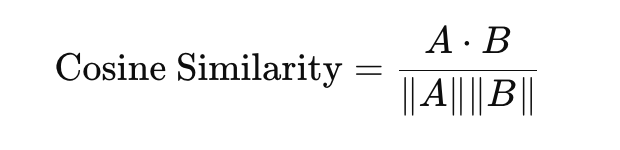

где:
- \( A * B \) — это скалярное произведение (dot product) векторов \( A \) и \( B \),
- \( \|A\| \) и \( \|B\| \) — это длины (нормы) векторов \( A \) и \( B \).

### Интерпретация результата:
- Значение косинусной близости находится в диапазоне от -1 до 1.
  - **1** означает, что векторы имеют одинаковое направление и полностью совпадают.
  - **0** означает, что векторы ортогональны, то есть не имеют общих признаков.
  - **-1** указывает, что векторы направлены в противоположные стороны (редко встречается на практике при работе с текстами).

Чем ближе значение к 1, тем больше похожи два вектора (или тексты).

### Пример использования:
Допустим, у нас есть два документа, которые мы преобразовали в TF-IDF векторы:
- Вектор документа 1: \( [0.1, 0.2, 0.3] \)
- Вектор документа 2: \( [0.2, 0.1, 0.4] \)

Косинусная близость между ними покажет, насколько эти два документа похожи друг на друга.

### Преимущества косинусной близости:
1. **Нормализует длину векторов**: Косинусная близость учитывает только направление векторов, игнорируя их длину, что полезно для текстов, так как она не зависит от количества слов в документе.
2. **Простота и эффективность**: Легко вычисляется и используется во многих задачах сравнения текстов, таких как поиск похожих документов, кластеризация, классификация и другие задачи NLP.
3. **Хорошо работает с разреженными векторами**: Часто применяется для векторов с большим количеством нулевых значений (как, например, TF-IDF), поскольку ориентирована на анализ сходства по ненулевым значениям.

### Применение:
Косинусная близость часто используется для:
- **Поиска похожих документов**: Например, при поиске информации можно сравнивать косинусную близость между запросом пользователя и документами в базе данных, чтобы найти наиболее релевантные.
- **Кластеризация текстов**: В задачах кластеризации можно группировать документы на основе их косинусной близости.
- **Сравнение семантической близости предложений**: Если тексты преобразованы в векторы с использованием Word Embeddings, можно измерить, насколько предложения или слова близки по значению.

Косинусная близость остается популярным и эффективным методом для задач измерения сходства в пространстве текстовых векторов.

### Косинусная близость

Между получившимеся векторами можно посчитать близость используя косинусное расстояние.

Для bow-векторов косинусное расстояние главным образом будет зависеть от количества общих слов в двух документах.



In [ ]:
train.loc[3, 'comment']
# Извлекаем значение из столбца 'comment' обучающей выборки 'train' для строки с индексом 3.
# Метод loc позволяет получить доступ к данным по метке индекса и названию столбца.
# В данном случае возвращается текст комментария, соответствующий указанному индексу.


'У моей мамы диабед уже много лет. И год назад мы всей семьёй сменили питание. Убрали полностью сахар во всех видах и продуктах, муку и фрукты (принимаю жесткое ограничение). Основная наша еда это овощи (кроме картофеля, кукурузы и бобовых, то есть очень-очень редко в малых количествах), мясо и молочка. В результате мама перешла с инсулина на таблетки. Чувствует себя прекрасно. И мы все тоже) Я понимаю, что ребенок и нужно полноценное питание, и в первое время страшно убирать крупы и макароны и прочее. Но оно того стоит.\n'

В sklearn есть косинусное расстояние и косинусная близость. Расстояние это просто единица минус близость (и наоборот), то есть расстояние между близкими векторами должно быть маленькое (0 если совпадают 1 - если вообще не совпадают), а близость наоборот (1 если совпадают 0 если не совпадают совсем).

Расстояние удобнее использовать, когда нужно отсортировать по близости, т.к в numpy по умолчанию сортируется по возрастанию.

In [ ]:
# функция предназначена для расчета близости между массивами векторов
# и возвращает она тоже массив где каждая строчка это объект и первого массива,
# а каждая колонка это близость до объекта во втором массиве

# в нашем случае в первом массиве у нас только 1 вектор
# поэтому мы можем взять первую строчку из получившегося массива
# метод .argsort вернет список индексов по возрастанию
# возьмем первые три индекса и посмотрим что там за тексты
top_idx = cosine_distances(X[3], X).argsort()[0,:3]
top_idx

array([   3, 5144, 1303])

In [ ]:
# первым нашелся этот же вектор
# а дальше уже не настолько близкие но все равно есть сходство
train.loc[top_idx, 'comment'].values

array(['У моей мамы диабед уже много лет. И год назад мы всей семьёй сменили питание. Убрали полностью сахар во всех видах и продуктах, муку и фрукты (принимаю жесткое ограничение). Основная наша еда это овощи (кроме картофеля, кукурузы и бобовых, то есть очень-очень редко в малых количествах), мясо и молочка. В результате мама перешла с инсулина на таблетки. Чувствует себя прекрасно. И мы все тоже) Я понимаю, что ребенок и нужно полноценное питание, и в первое время страшно убирать крупы и макароны и прочее. Но оно того стоит.\n',
       'с чего вы взяли, что нужно много тратить на питание?\n',
       'правильное питание стоит дорого\n'], dtype=object)

Мы векторизовали обучающую выборку, осталось векторизовать тестовую.

Векторайзеры в sklearn имеют три основных метода **fit**, **transform** и **fit_transform**.

**fit** - собирает словарь и статистики по текстам,   
**transform** - преобразует тексты в векторы, на основе уже собранного словаря.  
**fit_transform** - делает сразу и первое и второе (быстре чем 1 и 2 по очереди).

Для теста нам нужно векторизовать тексты тем же словарем, для этого вызовем метод .transform

Повторим еще раз векторизацию и достанем отдельно целевую переменную.

In [ ]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.3)
# Создаем объект TfidfVectorizer с параметрами min_df и max_df.
# Параметр min_df=10 указывает, что будут учитываться только те слова, которые встречаются как минимум в 10 документах (комментариях).
# Параметр max_df=0.3 указывает, что слова, встречающиеся более чем в 30% документов, будут исключены.
# Это помогает убрать редкие слова и слишком часто встречающиеся, которые не дают значимой информации.

X = vectorizer.fit_transform(train.comment)
# Применяем метод fit_transform к столбцу 'comment' из обучающей выборки.
# Метод fit обучает векторизатор на этих текстах, создавая словарь уникальных слов с учетом заданных параметров,
# а transform преобразует тексты в матрицу TF-IDF.


X_test = vectorizer.transform(test.comment)
# Применяем метод transform к столбцу 'comment' из тестовой выборки.
# Здесь мы используем метод transform вместо fit_transform, чтобы преобразовать тексты тестовой выборки
# с использованием того же словаря, который был создан на обучающей выборке.


In [ ]:
X.shape, X_test.shape


((12970, 3378), (1442, 3378))

In [ ]:
y = train.toxic.values
# Извлекаем значения из столбца 'toxic' обучающей выборки 'train' и сохраняем их в переменной y.
# Это будет целевая переменная (метка) для обучения модели, где каждое значение соответствует метке токсичности комментария.

y_test = test.toxic.values
# Извлекаем значения из столбца 'toxic' тестовой выборки 'test' и сохраняем их в переменной y_test.
# Это целевая переменная для тестирования модели, позволяющая оценить её производительность на новых данных.


In [ ]:
y

array([0., 0., 0., ..., 1., 0., 0.])

### Алгоритмы классификации

Теперь попробуем обучить модель. Рассмотрим 5 алгоритма, которые можно попробовать прежде чем переходить к чему-то более сложному: KNN, Logistic Regression, Decision Trees, Naive Bayes, RandomForest.

Кратко идея этих алгоритмов:

1) **KNN** - это предсказания класса текста по близости к другим текстам, для которых известен класс. Выше мы считали близость между текстами косинусным расстоянием - в KNN делается то же самое (но метрика может быть другая), только рассматривается топ-K ближайших текстов. В KNN таким образом нет никакого обучения - просто запоминание тестовой выборки и сравнение с ней при предсказании.

2) **Логистическая регрессия.** Предсказание с помощью обученной модели логистической регрессии - это по сути взвешенное средние чисел во входном векторе и приведение получившегося числа в интервал от 0 до 1 с помощью специальной функции (сигмоиды). Если получившееся значение больше 0.5, то считаем, что этот текст "токсичный", а если нет, то "нейтральный" (но можем подобрать и другие пороги).

3) **Дерево решений** - это просто много вложенных if else. В процессе обучения подбирается такая серия условий типа "тфидф этого слова больше 1.23" или "частотность слова_а больше частотности слова_б", чтобы в итоге получалось предсказать правильный класс текста. Плюсом деревьев решений является их интерпретируемость - для каждого предсказания можно вывести цепочку условий, которая привела к такому выводу.

Каждое условие в дереве разделяет пространство пополам, поэтому график решающего дерева будет состоять из четырехугольников.

4) **Наивный байесовский классификатор**. НБ классификатор принимает решение по вероятностям, рассчитаным на обучающем корпусе. В частности нужно три вероятности:  
а) вероятность встретить конкретное слово в классе А и Б (токсик и нетоксик в нашем случае);   
б) вероятность каждого класса.
в) вероятность каждого слова.

Эти вероятности расчитываются по частностям. Например, количество токсичных документов со словом, поделенное на общее количество документов с этим словом - это вероятность встретить слово в токсичном классе, а количество токсичных документов, поделенное на общее количество документов - это вероятность токсичного класса, а количество вхождений слова, поделенное на общее количество слов - вероятность слова.

Эти вероятности перемножаются по формуле Байеса.

Можно сказать, что в наивном байесе ничего и не обучается, а просто считаются статистики. При предсказании для каждого класса перемножаются соответствующие вероятности слов, присуствующих в тексте, и класс набравший большую оценку выбирается.

5) **RandomForest** - это N деревьев решений, объединенных в один большой классификатор (лес). Такие классификаторы называются ансамблями.
Отдельные деревья решений могут быть очень слабыми, если пробовать применить их самостоятельно, но вместе они дают очень хороший результат.










### Моделирование

In [ ]:
clf = LogisticRegression(C=0.1)
# Создаем объект логистической регрессии (LogisticRegression) и присваиваем его переменной clf.
# Параметр C=0.1 задает степень регуляризации модели.
# Меньшие значения C увеличивают регуляризацию, что помогает избежать переобучения (overfitting), но может снизить точность модели.
# Таким образом, мы настраиваем модель на более консервативное поведение.


In [ ]:
# fit обучает модель
clf.fit(X, y)


LogisticRegression(C=0.1)

In [ ]:
clf.classes_
# Выводим классы, которые модель логистической регрессии (clf) распознает.
# Атрибут classes_ содержит уникальные метки целевой переменной, на которой была обучена модель.
# В случае задачи бинарной классификации, как в этом примере, это будет массив с двумя классами (например, 0 и 1 для нетоксичных и токсичных комментариев).


array([0., 1.])

In [ ]:
# предикт предсказывает классы
preds = clf.predict(X_test)

### Метрики

In [ ]:
print(classification_report(y_test, preds))
# Выводим отчет о классификации, сравнивая истинные метки (y_test) с предсказанными метками (preds).

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85       964
         1.0       0.93      0.31      0.46       478

    accuracy                           0.76      1442
   macro avg       0.83      0.65      0.66      1442
weighted avg       0.80      0.76      0.72      1442



In [ ]:
# predict_proba возвращает вероятности классов
# это полезно когда нужно подобрать порог например
probas = clf.predict_proba(X_test)

In [ ]:
# в левой колонке вероятность 0 (нетокстичности)
# в правой - вероятность 1 (токсичности)
probas

array([[0.48096184, 0.51903816],
       [0.77034053, 0.22965947],
       [0.79967201, 0.20032799],
       ...,
       [0.65928746, 0.34071254],
       [0.43426919, 0.56573081],
       [0.68643342, 0.31356658]])

In [ ]:
# возьмем вторую колонку
# проверим что она больше 0,85
# заменим True и False на 0 и 1 чтобы получить предсказания
preds = (probas[:,1]>0.45).astype(int)

In [ ]:
# точность по токсичному классу сильно выросла но при этом упала полнота
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86       964
         1.0       0.90      0.42      0.57       478

    accuracy                           0.79      1442
   macro avg       0.84      0.70      0.72      1442
weighted avg       0.81      0.79      0.77      1442



Попробуем другие классификаторы

In [ ]:
clf = MultinomialNB(alpha=1.)
# Создаем объект класса MultinomialNB (модель наивного байесовского классификатора) и присваиваем его переменной clf.
# Параметр alpha=1. определяет значение сглаживания Лапласа, что помогает избежать проблем с нулевыми вероятностями.
# Это значение сглаживания позволяет модели более устойчиво справляться с новыми данными, особенно если в тестовом наборе могут встречаться слова, которых не было в обучающем наборе.

clf.fit(X, y)
# Обучаем модель на векторизованных данных (X) и соответствующих метках (y) с помощью метода fit.
# Модель будет оптимизироваться, чтобы минимизировать ошибку предсказания на обучающих данных.

preds = clf.predict(X_test)
# Применяем метод predict для получения предсказаний классов на тестовых данных (X_test) с помощью обученной модели MultinomialNB (clf).
# Результат сохраняется в переменной preds, которая будет содержать предсказанные метки токсичности для каждого комментария в тестовой выборке.

print(classification_report(y_test, preds))
# Выводим отчет о классификации, сравнивая истинные метки (y_test) с предсказанными метками (preds).


              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       964
         1.0       0.88      0.55      0.68       478

    accuracy                           0.83      1442
   macro avg       0.84      0.76      0.78      1442
weighted avg       0.83      0.83      0.81      1442



In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
# Создаем объект класса DecisionTreeClassifier (классификатор на основе дерева решений) и присваиваем его переменной clf.
# Параметр max_depth=3 устанавливает максимальную глубину дерева, что помогает контролировать сложность модели и предотвращает переобучение (overfitting).

clf.fit(X, y)
# Обучаем модель на векторизованных данных (X) и соответствующих метках (y) с помощью метода fit.
# Модель будет строить дерево решений, основываясь на обучающих данных, чтобы минимизировать ошибку предсказания.

preds = clf.predict(X_test)
# Применяем метод predict для получения предсказаний классов на тестовых данных (X_test) с помощью обученной модели DecisionTreeClassifier (clf).
# Результат сохраняется в переменной preds, которая будет содержать предсказанные метки токсичности для каждого комментария в тестовой выборке.

print(classification_report(y_test, preds))
# Выводим отчет о классификации, сравнивая истинные метки (y_test) с предсказанными метками (preds).


              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       964
         1.0       0.84      0.16      0.27       478

    accuracy                           0.71      1442
   macro avg       0.77      0.57      0.54      1442
weighted avg       0.75      0.71      0.64      1442



In [ ]:
clf = KNeighborsClassifier(n_neighbors=10, metric='cosine')
# Создаем объект класса KNeighborsClassifier (классификатор на основе метода k ближайших соседей) и присваиваем его переменной clf.
# Параметр n_neighbors=10 указывает, что для классификации будет использоваться 10 ближайших соседей.
# Параметр metric='cosine' устанавливает косинусное расстояние в качестве метрики для измерения расстояний между векторами.

clf.fit(X, y)
# Обучаем модель на векторизованных данных (X) и соответствующих метках (y) с помощью метода fit.
# Для метода k ближайших соседей фактически обучение состоит в запоминании обучающих данных, так как в дальнейшем для классификации будут использоваться соседи.

preds = clf.predict(X_test)
# Применяем метод predict для получения предсказаний классов на тестовых данных (X_test) с помощью обученной модели KNeighborsClassifier (clf).
# Результат сохраняется в переменной preds, которая будет содержать предсказанные метки токсичности для каждого комментария в тестовой выборке.

print(classification_report(y_test, preds))
# Выводим отчет о классификации, сравнивая истинные метки (y_test) с предсказанными метками (preds).

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       964
         1.0       0.67      0.61      0.64       478

    accuracy                           0.77      1442
   macro avg       0.74      0.73      0.74      1442
weighted avg       0.77      0.77      0.77      1442



### Мешок нграмм

Для того чтобы учесть информацию о порядке слов и при этом остаться в рамках простой мешкословной модели, можно использовать небольшой трюк — добавить в словарь **н-граммы**. Н-граммы представляют собой последовательности из N слов, встречающиеся в тексте, что позволяет частично сохранить порядок слов и их взаимосвязи.

У векторизаторов (например, `CountVectorizer` или `TfidfVectorizer` в библиотеке scikit-learn) есть параметр **`ngram_range`**, который по умолчанию задан как `(1, 1)`, что означает использование только униграмм (отдельных слов). Мы можем изменить его на `(1, 2)` или `(1, 3)`, чтобы в словаре появились также биграммы (последовательности из двух слов) и триграммы (последовательности из трех слов), соответственно.

#### Пример:
Возьмем предложение "Кошка спит на ковре". При использовании:
- **Униграмм (1, 1)**: словарь будет содержать отдельные слова — ["Кошка", "спит", "на", "ковре"].
- **Биграмм (2, 2)**: словарь будет включать последовательности двух слов — ["Кошка спит", "спит на", "на ковре"].
- **Триграмм (3, 3)**: словарь будет содержать трехсловные последовательности — ["Кошка спит на", "спит на ковре"].

#### Преимущества использования н-грамм:
1. **Учет порядка слов**: В отличие от классического мешка слов, использование н-грамм помогает учесть порядок слов и их зависимость друг от друга. Например, биграмма "сильный дождь" имеет совершенно другой смысл, чем "дождь сильный", несмотря на одинаковый набор слов.
2. **Повышение контекстуальности**: Н-граммы помогают улавливать контексты и устойчивые словосочетания, что особенно важно для понимания значений, где слова часто используются в связке (например, "искусственный интеллект", "машинное обучение").
3. **Более информативные признаки**: Использование биграмм и триграмм позволяет модели получать более детализированное представление о текстах, что может улучшить качество классификации и других задач.

#### Недостатки и вызовы:
1. **Увеличение размера словаря**: Добавление н-грамм существенно увеличивает количество признаков (размер векторного пространства), что может привести к разреженности данных и увеличению объема памяти и вычислительных ресурсов.
2. **Риск переобучения**: В больших текстовых корпусах можно столкнуться с проблемой переобучения, так как редкие или уникальные сочетания слов могут слишком сильно влиять на модель. Это особенно важно при использовании высоких значений n.
3. **Уменьшение обобщающей способности**: Н-граммы фиксируют конкретные последовательности слов, что может мешать модели улавливать общие закономерности в тексте, особенно если используется большой n-граммный диапазон.

#### Применение:
- **Анализ тональности**: Н-граммы полезны в задачах анализа тональности, так как позволяют улавливать устойчивые словосочетания и фразы, которые несут ключевую смысловую нагрузку (например, "очень хороший", "крайне недоволен").
- **Классификация текстов**: Для улучшения классификации текстов можно добавить биграммы и триграммы, чтобы улавливать выражения, характерные для определенных категорий.
- **Поиск информации**: Н-граммы позволяют точнее находить релевантные документы, особенно если запросы пользователя содержат многословные фразы.

Таким образом, мешок н-грамм — это эффективное расширение классической модели мешка слов, которое частично сохраняет информацию о последовательности слов и улучшает представление текста для задач машинного обучения.

In [ ]:
data = pd.read_csv('drive/My Drive/labeled.csv')
# Загружаем данные из CSV-файла 'labeled.csv' в DataFrame с помощью функции read_csv из библиотеки pandas.
#
train, test = train_test_split(data, test_size=0.1, shuffle=True)
# Разделяем набор данных на обучающую (train) и тестовую (test) выборки с помощью функции train_test_split из библиотеки scikit-learn.
# Параметр test_size=0.1 указывает, что 10% данных будут отведены для тестирования, а остальные 90% — для обучения.
# Параметр shuffle=True гарантирует, что данные будут случайным образом перемешаны перед разделением, что помогает избежать смещения.

train.reset_index(inplace=True)
# Сбрасываем индексы в обучающей выборке 'train' и обновляем DataFrame на месте.
# Это необходимо, чтобы индексы были последовательными после разделения, что может быть полезно для дальнейшей обработки данных.

test.reset_index(inplace=True)
# Аналогично сбрасываем индексы в тестовой выборке 'test', чтобы обеспечить последовательные индексы в этом DataFrame.


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, min_df=10,
                             max_df=0.1, ngram_range=(1, 3))
# Создаем объект TfidfVectorizer с заданными параметрами.
# max_features=1000 ограничивает количество уникальных признаков (слов или n-грамм) до 1000, что помогает уменьшить размерность данных.
# min_df=10 указывает, что будут учитываться только слова, встречающиеся как минимум в 10 документах (комментариях).
# max_df=0.1 исключает слова, встречающиеся более чем в 10% документов, чтобы убрать слишком часто встречающиеся слова, которые могут не нести значимой информации.
# ngram_range=(1, 3) позволяет учитывать не только отдельные слова (1-граммы), но и пары (2-граммы) и тройки (3-граммы) последовательных слов, что может помочь захватить контекст.

X = vectorizer.fit_transform(train.comment)
# Применяем метод fit_transform к столбцу 'comment' из обучающей выборки.
# Метод fit обучает векторизатор на этих текстах, создавая словарь уникальных слов и n-грамм с учетом заданных параметров,
# а transform преобразует тексты в матрицу TF-IDF.
# В результате 'X' — это матрица TF-IDF для обучающей выборки.

X_test = vectorizer.transform(test.comment)
# Применяем метод transform к столбцу 'comment' из тестовой выборки.
# Здесь мы используем метод transform вместо fit_transform, чтобы преобразовать тексты тестовой выборки
# с использованием того же словаря, который был создан на обучающей выборке.
# В результате 'X_test' — это матрица TF-IDF для тестовой выборки, содержащая те же слова и n-граммы, что и в обучающей выборке.


In [ ]:
y = train.toxic.values
# Извлекаем значения из столбца 'toxic' обучающей выборки 'train' и сохраняем их в переменной y.
# Эта переменная представляет собой целевую переменную (метки), где 1 указывает на токсичный комментарий, а 0 — на нетоксичный.
# Эти метки будут использоваться для обучения модели, чтобы она могла распознавать токсичные комментарии.

y_test = test.toxic.values
# Извлекаем значения из столбца 'toxic' тестовой выборки 'test' и сохраняем их в переменной y_test.
# Эта переменная представляет собой целевую переменную для тестовой выборки, позволяющую оценить производительность модели на новых данных.


Посмотрим, какие нграммы попали в словарь

In [ ]:
#vectorizer.get_feature_names() показывает словарь, индексы в списке соответствуют колонкам в матрице
# нграмы склеиваются через пробел в sklearn

[x for x in vectorizer.get_feature_names_out() if ' ' in x][:30]

['10 лет',
 'больше чем',
 'бы не',
 'было бы',
 'во время',
 'вообще не',
 'вот это',
 'все же',
 'все равно',
 'все таки',
 'все это',
 'вы не',
 'где то',
 'да не',
 'даже если',
 'даже не',
 'для меня',
 'для того',
 'до сих',
 'до сих пор',
 'думаю что',
 'если бы',
 'если есть',
 'если не',
 'если ты',
 'если это',
 'же не',
 'за это',
 'зависит от',
 'знаю как']

In [ ]:
X.shape, y.shape
# Выводим размеры матрицы X и вектора y.

((12970, 1000), (12970,))

In [ ]:
# Выводим размеры матрицы X_test и вектора y_test.
X_test.shape, y_test.shape

((1442, 1000), (1442,))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
# Создаем объект класса RandomForestClassifier (случайный лес) и присваиваем его переменной rf.
# Параметр n_estimators=100 указывает количество деревьев в лесу, что обычно увеличивает производительность модели,
# поскольку ensemble (ансамбль) из нескольких деревьев обычно более устойчив к переобучению.
# Параметр max_depth=20 устанавливает максимальную глубину каждого дерева, что также помогает контролировать сложность модели.

rf.fit(X, y)
# Обучаем модель случайного леса на векторизованных данных (X) и соответствующих метках (y) с помощью метода fit.
# Модель будет строить 100 деревьев решений на основе обучающих данных, используя их для минимизации ошибки предсказания.

preds = rf.predict(X_test)
# Применяем метод predict для получения предсказаний классов на тестовых данных (X_test) с помощью обученной модели случайного леса (rf).
# Результат сохраняется в переменной preds, которая будет содержать предсказанные метки токсичности для каждого комментария в тестовой выборке.

print(classification_report(y_test, preds, zero_division=0))
# Выводим отчет о классификации, сравнивая истинные метки (y_test) с предсказанными метками (preds).

              precision    recall  f1-score   support

         0.0       0.71      0.98      0.82       945
         1.0       0.85      0.25      0.38       497

    accuracy                           0.73      1442
   macro avg       0.78      0.61      0.60      1442
weighted avg       0.76      0.73      0.67      1442



In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 1.])

## Анализ тональности

**Анализ тональности** (Sentiment Analysis) — это процесс определения
эмоциональной окраски текста. Чаще всего анализируют, является ли текст
положительным, отрицательным или нейтральным. Данный метод широко
используется в маркетинге, обслуживании клиентов и исследованиях
общественного мнения, чтобы понять, как потребители воспринимают
продукты, бренды или события.

#### Зачем нужен анализ тональности?


* **Мониторинг бренда**: Определение общественного мнения о компании или продукте. Компании могут отслеживать тональность обсуждений в социальных сетях, блогах и новостях, чтобы понять, как воспринимается их бренд и как меняются настроения аудитории со временем.

* **Исследования рынка**: Анализ отзывов и комментариев клиентов помогает компаниям выявлять ключевые проблемы и сильные стороны продукта. Это позволяет лучше понимать потребности клиентов и оперативно адаптироваться к их ожиданиям.

* **Автоматизация поддержки**: Быстрое определение негативных отзывов для оперативного реагирования. Системы анализа тональности помогают службам поддержки выделять негативные отзывы или жалобы, чтобы приоритетно работать с проблемными клиентами и предотвращать эскалацию конфликтов.

* **Оценка маркетинговых кампаний**: Компании могут измерять реакцию аудитории на рекламные кампании или запуск новых продуктов. Анализ тональности позволяет понять, как восприняты те или иные маркетинговые сообщения и корректировать стратегию в реальном времени.



#### Подходы к анализу тональности

* **Правила и словари**: Используют предопределенные списки слов с присвоенными им тональностями (позитивные, негативные или нейтральные). Этот подход основывается на поиске в тексте слов из словаря и присвоении тональности тексту в зависимости от встреченных слов. Хотя такие системы просты и быстры в реализации, они могут плохо справляться с учетом контекста и многозначных слов, а также не всегда адаптивны к изменениям языка и новым терминам.

* **Машинное обучение**: Обучение моделей на размеченных данных для определения тональности текста. Этот подход включает использование методов классического машинного обучения, таких как логистическая регрессия, случайный лес, SVM и другие. Тексты преобразуются в числовые признаки (например, с помощью TF-IDF или мешка слов), на которых обучается модель для предсказания тональности. Машинное обучение позволяет строить более гибкие модели, но для достижения хороших результатов требуется достаточное количество размеченных данных.

* **Глубокое обучение и трансформеры**: Использование сложных моделей для учета контекста и семантики. Современные методы анализа тональности основаны на нейронных сетях, включая рекуррентные сети (LSTM, GRU) и трансформеры (BERT, GPT). Эти модели могут учитывать контекст предложения и определять тональность на более глубоком уровне. Они способны улавливать сложные зависимости между словами и справляться с задачами анализа длинных текстов и предложений с изменяющимся контекстом. Модели трансформеров особенно эффективны благодаря своей способности захватывать глобальные зависимости в тексте, что делает их стандартом для многих задач NLP.


**VADER** (Valence Aware Dictionary and sEntiment Reasoner) — это алгоритм для анализа тональности текстов, специально разработанный для обработки коротких текстов, таких как сообщения в социальных сетях, отзывы и комментарии. VADER использует комбинацию словарного подхода и правил для определения эмоциональной окраски текста.

### Пример

In [ ]:
# Импортируем необходимые библиотеки
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Импорт анализатора настроений из NLTK
import nltk  # Импорт NLTK для загрузки лексикона VADER
nltk.download('vader_lexicon')  # Загрузка лексикона VADER из NLTK

# Создаем экземпляр SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Задаем текст для анализа
text = "This is the best day ever!"

# Вычисляем оценку настроений с помощью VADER
score = sid.polarity_scores(text)

# Выводим результаты
print(score)


{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...




- **`'neg'`: 0.0** — это доля негативной тональности в тексте. В данном случае значение 0.0 указывает на то, что в тексте нет негативных эмоций.

- **`'neu'`: 0.527** — это доля нейтральной тональности. Значение 0.527 (или 52.7%) говорит о том, что чуть больше половины текста выражает нейтральные эмоции, не имея явной позитивной или негативной окраски.

- **`'pos'`: 0.473** — это доля позитивной тональности. Значение 0.473 (или 47.3%) означает, что почти половина текста имеет позитивный заряд.

- **`'compound'`: 0.6696** — это композитная оценка, которая является сводной метрикой, отражающей общую тональность текста. Значение композитной оценки колеблется от -1 (полностью негативный) до +1 (полностью позитивный). В данном случае, значение 0.6696 указывает на то, что текст имеет в целом позитивную тональность.

##### Интерпретация
Этот результат указывает на то, что анализируемый текст в основном нейтральный с небольшим уклоном в позитивную сторону, так как доля позитивной тональности почти равна нейтральной. Общая композитная оценка также подтверждает это, показывая, что текст имеет положительное настроение.

## ПРАКТИКА

Рассматривая Twitter, можно заметить, что каждую секунду генерируется множество твитов различными пользователями. Некоторые из этих твитов могут быть положительными, в то время как другие — отрицательными. Было бы очень полезно, если бы машинное обучение и глубокое обучение могли классифицировать тексты и твиты как положительные, отрицательные или нейтральные. В результате этого можно сэкономить много времени и ресурсов компании, без необходимости использовать человеческие ресурсы для выполнения этих простых задач.

В этом проекте машинного обучения мы будем работать с твитами в реальном времени и предсказывать их тональность.

In [ ]:
# Установка необходимых библиотек
!pip install pandas numpy nltk scikit-learn lightgbm seaborn matplotlib

# Импортируем библиотеки для работы с данными и визуализации
import pandas as pd  # Pandas для работы с данными в формате таблиц (DataFrame)
import numpy as np   # NumPy для работы с массивами и числовыми операциями
import nltk          # NLTK для обработки естественного языка
import seaborn as sns  # Seaborn для создания красивых графиков
import matplotlib.pyplot as plt  # Matplotlib для построения графиков

# Импортируем модули для машинного обучения
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.ensemble import RandomForestClassifier  # Классификатор случайного леса
from lightgbm import LGBMClassifier  # Классификатор LightGBM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Метрики для оценки модели


Ссылка на датасет: https://www.kaggle.com/c/tweet-sentiment-extraction/data

In [ ]:
# Загрузка данных
data = pd.read_csv('drive/MyDrive/train 2.csv')

# Просмотр первых строк данных
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


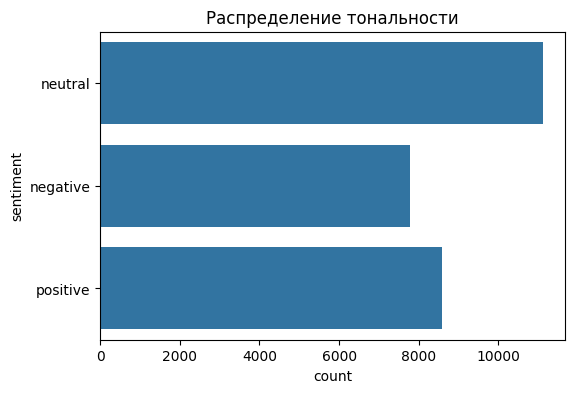

In [ ]:
# Создаем график распределения тональности
plt.figure(figsize=(6, 4))  # Устанавливаем размер графика (ширина 6 дюймов, высота 4 дюйма)

# Используем seaborn для построения столбчатой диаграммы
sns.countplot(data['sentiment'])  # Столбчатая диаграмма по столбцу 'sentiment' в датафрейме 'data'

# Устанавливаем заголовок графика
plt.title('Распределение тональности')

# Отображаем график
plt.show()


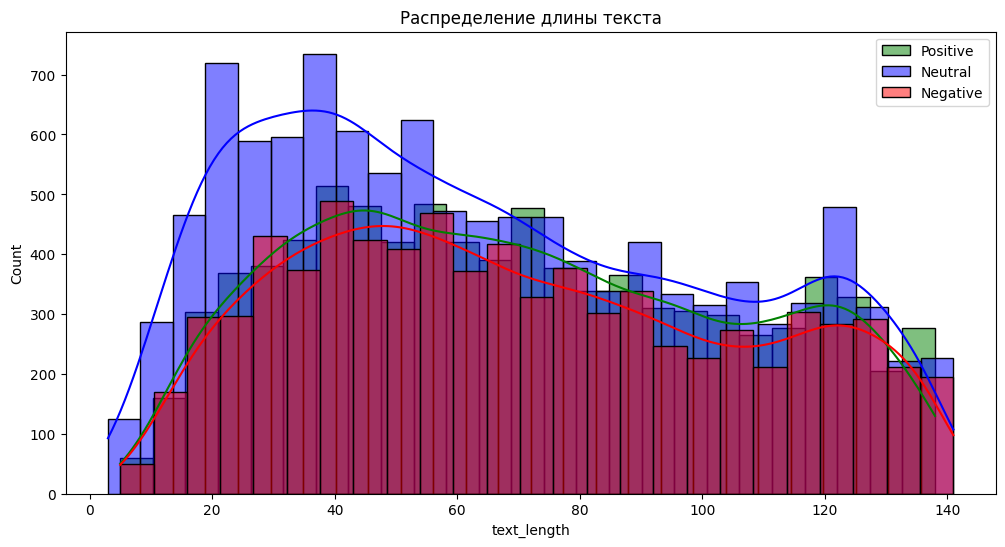

In [ ]:
# Добавление столбцов с длиной текста в датафрейм
data['text_length'] = data['text'].astype(str).apply(len)  # Создаем столбец 'text_length', который содержит длину каждого текста
data['selected_text_length'] = data['selected_text'].astype(str).apply(len)  # Создаем столбец 'selected_text_length' для длины выделенного текста

# Визуализация распределения длины текста
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика (ширина 12 дюймов, высота 6 дюймов)

# Строим гистограмму для положительных настроений с ядерной оценкой плотности (KDE)
sns.histplot(data[data['sentiment'] == 'positive']['text_length'], kde=True, color='green', label='Positive')
# Строим гистограмму для нейтральных настроений с ядерной оценкой плотности (KDE)
sns.histplot(data[data['sentiment'] == 'neutral']['text_length'], kde=True, color='blue', label='Neutral')
# Строим гистограмму для отрицательных настроений с ядерной оценкой плотности (KDE)
sns.histplot(data[data['sentiment'] == 'negative']['text_length'], kde=True, color='red', label='Negative')

# Устанавливаем заголовок графика
plt.title('Распределение длины текста')
# Добавляем легенду для обозначения каждого класса настроений
plt.legend()
# Отображаем график
plt.show()


In [ ]:
!pip install -q wordcloud
# Эта библиотека полезна для визуализации текстовых данных и может помочь выявить ключевые темы или слова в большом объеме текстов.

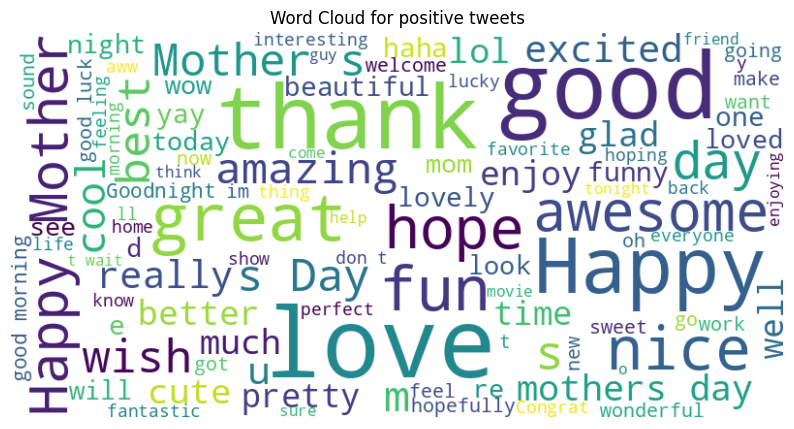

In [ ]:
from wordcloud import WordCloud  # Импортируем класс WordCloud из библиотеки wordcloud

# Функция для создания облаков слов
def generate_wordcloud(data, sentiment):
    # Объединяем все тексты, соответствующие заданной тональности, в одну строку
    text = ' '.join(data[data['sentiment'] == sentiment]['selected_text'].astype(str))

    # Создаем объект WordCloud с заданными параметрами
    wordcloud = WordCloud(width=800, height=400,
                          max_font_size=100, max_words=100,
                          background_color='white').generate(text)

    # Создаем новое окно для отображения облака слов
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')  # Отображаем облако слов с интерполяцией
    plt.title(f'Word Cloud for {sentiment} tweets')  # Устанавливаем заголовок графика
    plt.axis('off')  # Отключаем оси
    plt.show()  # Отображаем график

# Генерируем облако слов для положительных твитов
generate_wordcloud(data, 'positive')


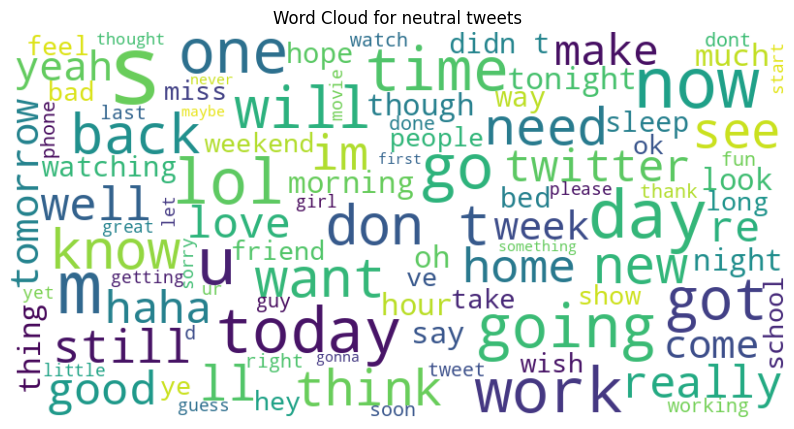

In [ ]:
# Генерируем облако слов для нейтральных твитов
generate_wordcloud(data, 'neutral')


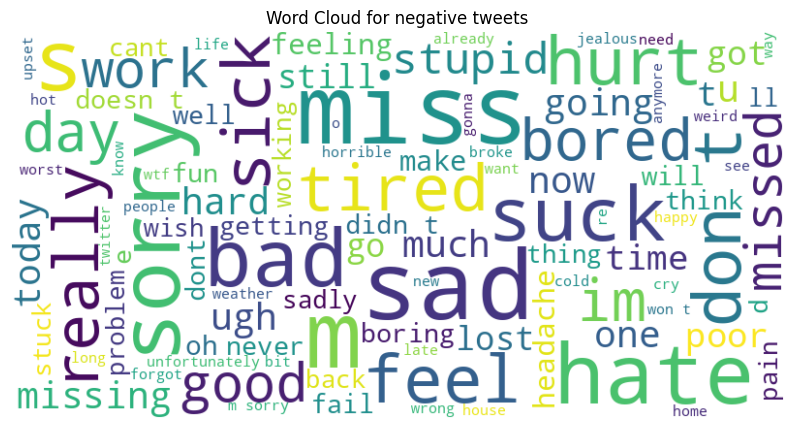

In [ ]:
# Генерируем облако слов для негативных твитов
generate_wordcloud(data, 'negative')
